In [1]:
from xinet import utils
from xinet import tensorflow as xinet

np = xinet.np
nn = xinet.nn

In [2]:
train_iter, test_iter = xinet.load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

(32, 64, 64, 1) <dtype: 'float32'> (32,) <dtype: 'int32'>


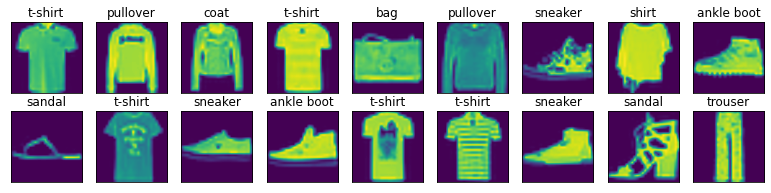

In [3]:
utils.show_images(X, 2, 9, titles=utils.get_fashion_mnist_labels(y));

In [4]:
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], 
                  [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

ndarray<<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.1, 0.5])>>

In [5]:
import tensorflow as tf
net = nn.Sequential()
net.add(nn.Flatten(input_shape=(64, 64)))
weight_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
net.add(nn.Dense(10, kernel_initializer=weight_initializer))

In [6]:
trainer = tf.keras.optimizers.SGD(learning_rate=.1)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

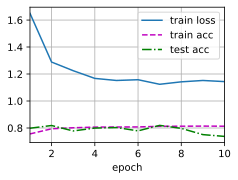

In [7]:
num_epochs = 10
xinet.train(net, train_iter, test_iter, loss, num_epochs, trainer)